# Model Evaluation 2 - Learning Curves

---

Here I run learning curves with the entire dataset, training and test included. This can be compared with the learning curves for the training data only to see whether training on unseen data makes these models perform worse - the expectation is that they perform better since I pre-selected them based on promising learning curves during training-modeling.

## Setup

In [5]:
import re
import os
import sys
import time
import joblib 

import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn.model_selection import train_test_split, \
    ShuffleSplit, StratifiedKFold, learning_curve
from sklearn.metrics import make_scorer, accuracy_score, \
    recall_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, \
    RandomForestClassifier, GradientBoostingClassifier, \
    VotingClassifier

import custom.evaluate_models as E

np.set_printoptions(threshold=sys.maxsize)
dt_object = datetime.fromtimestamp(time.time())
day, T = str(dt_object).split('.')[0].split(' ')
print('Revised on: ' + day)

Revised on: 2021-02-22


## Load Targets

In [33]:
def load_y(data):
    raw_path = os.path.join("data","1_raw")
    filename = ''.join([data, ".csv"])
    out_dfm = pd.read_csv(os.path.join(raw_path, filename))
    out_arr = np.array(out_dfm.iloc[:,0].ravel())
    return out_arr

y_train = load_y("y_train")
y_test = load_y("y_test") 

y_array = np.hstack([y_train, y_test])

def make_int(y_array):
    y = y_array.copy()
    y[y=='ham'] = 0
    y[y=='spam'] = 1
    y = y.astype('int')
    return y

y = make_int(y_array)

## Load Preprocessed Sets

In [41]:
def load_X(filename):
    proc_dir = os.path.join("data", "2_processed")
    filename = ''.join([filename, '.npz'])
    X = sp.load_npz(os.path.join(proc_dir, filename))
    return X

X_train = load_X('X_train_processed')
X_test = load_X('X_test_processed')

X = sp.vstack([X_train, X_test])

In [42]:
# sanity check
X, y.shape

(<5572x801 sparse matrix of type '<class 'numpy.float64'>'
 	with 4461570 stored elements in COOrdinate format>,
 (5572,))

## Instantiate Candidate Models

In [43]:
rnd_clf1 = RandomForestClassifier(
    random_state=42, n_estimators=100, max_features=150, 
    max_depth=8, min_samples_split=3, warm_start=True, 
    n_jobs=1)

rnd_clf2 = RandomForestClassifier(
    random_state=42, n_estimators=100, max_features=300, 
    max_depth=8, min_samples_split=3, warm_start=True, 
    n_jobs=1)
    
ada_clf1 =  AdaBoostClassifier(
    random_state=42, n_estimators=10, 
    learning_rate=0.001)

gbc1a = GradientBoostingClassifier(
    random_state=42, n_estimators=50, max_features=None, 
    max_depth=1, min_samples_split=2)

gbc2a = GradientBoostingClassifier(
    random_state=42, n_estimators=100, max_features=300, 
    max_depth=8, min_samples_split=5)

gbc2c = GradientBoostingClassifier(
    random_state=42, n_estimators=50, max_features=300, 
    max_depth=3, min_samples_split=5)

## 10-fold Cross Validation Learning Plots

In [6]:
# 10-fold cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

Elapsed: 9 m 2 s


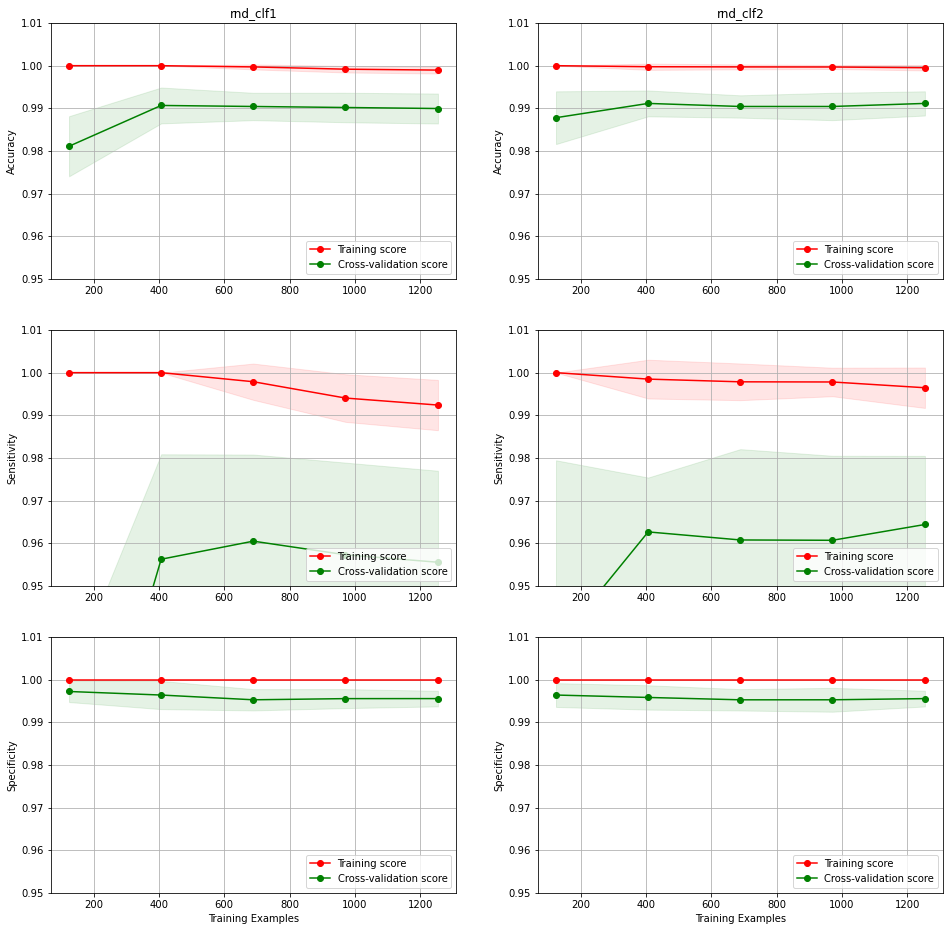

In [7]:
E.compare_two_classifiers(X, y, rnd_clf1, rnd_clf2, "rnd_clf1", "rnd_clf2", cv)

Elapsed: 3 m 33 s


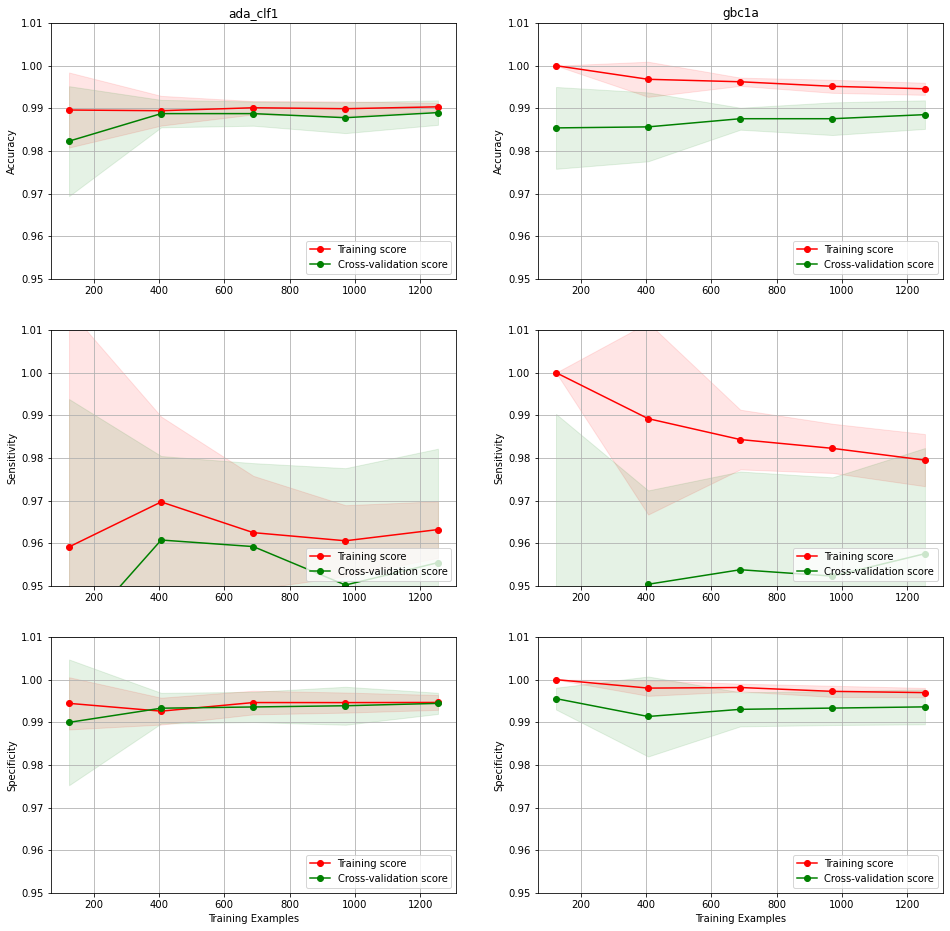

In [8]:
E.compare_two_classifiers(X, y, ada_clf1, gbc1a, "ada_clf1", "gbc1a", cv)

Elapsed: 18 m 16 s


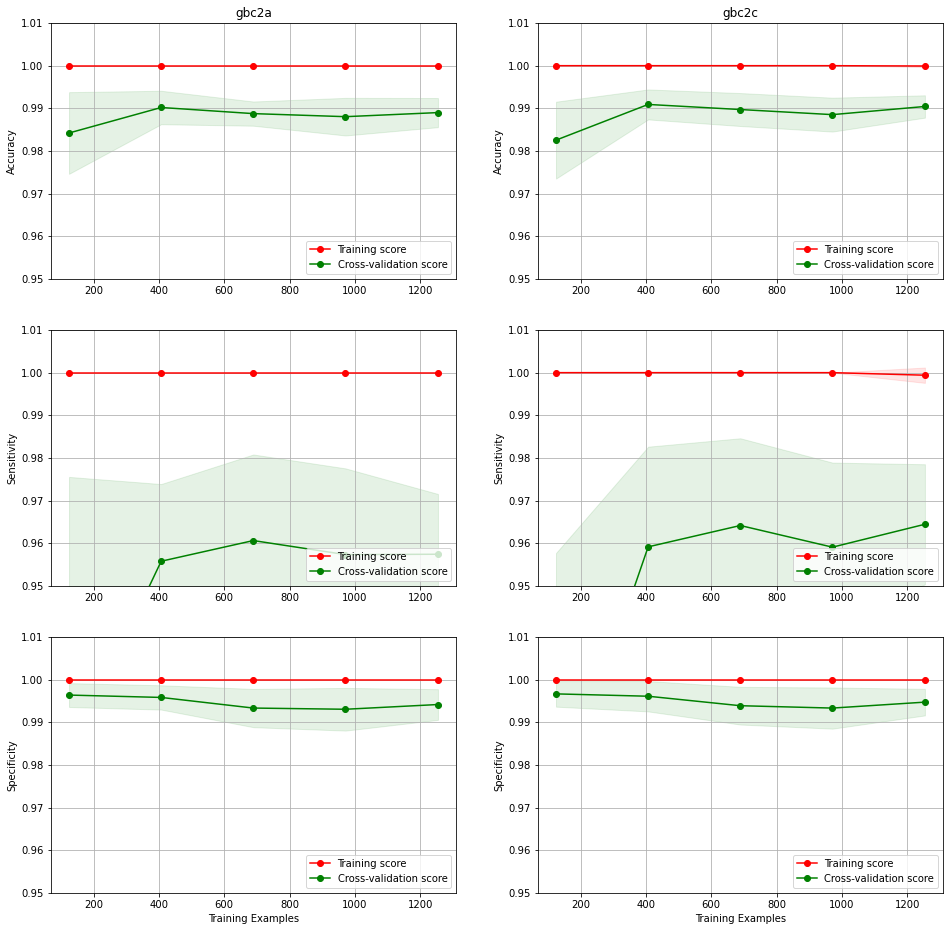

In [9]:
E.compare_two_classifiers(X, y, gbc2a, gbc2c, "gbc2a", "gbc2c", cv)